<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Keeping-Conda-up-to-date-and-installing-new-packages" data-toc-modified-id="Keeping-Conda-up-to-date-and-installing-new-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Keeping Conda up to date and installing new packages</a></span><ul class="toc-item"><li><span><a href="#Installing-a-new-package-in-your-virtual-environment" data-toc-modified-id="Installing-a-new-package-in-your-virtual-environment-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Installing a new package in your virtual environment</a></span></li><li><span><a href="#Updating-an-existing-package" data-toc-modified-id="Updating-an-existing-package-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Updating an existing package</a></span></li></ul></li><li><span><a href="#Building-regression-models" data-toc-modified-id="Building-regression-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Building regression models</a></span></li></ul></div>

> All content here is under a Creative Commons Attribution [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/) and all source code is released under a [BSD-2 clause license](https://en.wikipedia.org/wiki/BSD_licenses).
>
>Please reuse, remix, revise, and [reshare this content](https://github.com/kgdunn/python-basic-notebooks) in any way, keeping this notice.

# Course overview

This is the fifth module of several (11, 12, 13, 14, 15 and 16), which refocuses the course material in the [prior 10  modules](https://github.com/kgdunn/python-basic-notebooks) in a slightly different way. It places more emphasis on

* dealing with data: importing, merging, filtering;
* calculations from the data;
* visualization of it.

In short: ***how to extract value from your data***.


# Module 15 Overview

In this module we will cover

* Fitting a linear regression model to the data
* Visualization of the linear regression model
* Accessing data from your data frame using `.loc` and `.iloc`
* TODO: Summarizing your data using an aggregation function.

**Requirements before starting**

* Have your Python installation working as you had for modules 11 to 14, including the Pandas library installed. 

* An extra requirement: install the `scikit-learn` and `seaborn` libraries. See instructions below.

## Keeping Conda up to date and installing new packages


Newer versions of packages are released frequently. You can update your packages (libraries), with this command::
```bash

    conda update -n base conda
    conda update --all
```

### Installing a new package in your virtual environment

You will come across people recommending different packages in Python for all sorts of interesting applications. For example, the library `seaborn` is often recommended for visualization. But you might not have it installed yet. 

This is how you can install the package called `seaborn` and `scikit-learn` packages in your virtual environment called ``myenv``:
```bash
    conda activate myenv    <--- change the last word in the command to the name of your actual environment
    conda install seaborn scikit-learn
```

Or in one line:
```bash
    conda install -n myenv seaborn scikit-learn
```


### Updating an existing package

Similar to the above, you can update a package to the latest version. Just change ``install`` to ``update`` instead.
Or in one line:
```bash
    conda update -n myenv seaborn scikit-learn
```

## Building regression models

In the [prior module](https://yint.org/pybasic14) you learned about setting the date and time when importing data, visualizing your data with box plots, histograms, line or time-series plots, and scatter plots. You applied these to your own data, and learned about the very powerful ``groupby`` function in Pandas.

In this module we will take these skills a step further, but first, we will learn about fitting regression models to some data. 

Start by importing Pandas, but also the tools to build regression models, from the `scikit-learn` library, which is imported as `sklearn`. You can read more about scikit-learn at their website: https://scikit-learn.org/stable/

In [6]:
import pandas as p
from sklearn.linear_model import LinearRegression

We will use a data set that is concerns a [distillation column](https://openmv.net/info/distillation-tower), and predicting an important output variable, called the Reid Vapour Pressure (RVP).

Read the data set in and set the column called "Case" to be the index:
```python
distill = pd.read_csv("https://openmv.net/file/distillation-tower.csv")
```

In the [prior module](https://yint.org/pybasic14) you were asked to 

1. calculate the correlation matrix of values and display that. Were you able to do so? 
2. Could you also visualize a scatter plot matrix of these values with the "kde" on the diagonal, squares for the markers and an alpha value of 0.8 for the points?
  
*Hint*: look at the documentation for `scatter_matrix` to see how to do this. You can look at the documentation inside Jupyter in several ways:
* ``help(scatter_matrix)``
* ``scatter_matrix?`` and then hit Ctrl-Enter.

In [166]:
distill = pd.read_csv("https://openmv.net/file/distillation-tower.csv")

In [167]:
# Here is the solution code for the above:
 
# display(distill.corr())
# from pandas.plotting import scatter_matrix
# scatter_matrix(distill, alpha = 0.2, figsize=(15, 15),  diagonal = "kde");


The data set is quite big and takes some time to generate all the scatter plot combinations.

We can use every third row instead.
```python
print(distill.shape)
subset = distill.iloc[0::3, :]
subset.shape
```

The `.iloc` function accesses the data by `index` (the `i` in `iloc`) and for a given `loc`ation, so `iloc`= *index location*.

Some examples:
* `.iloc[0:10, :]` will return the first 10 rows, and all columns
* `.iloc[20, 2:4]` will return only row 21, and columns 3 and 4 
* `.iloc[0:10:2, :]` will return only rows with index 0, 2, 4, 6 and 8; and all columns
* `.iloc[0::2, :]` will return every second row; and all columns
* `.iloc[:, -1]` will return all rows of the last column

Now that you understand what `.iloc` is doing, you can understand why this code is faster, because it uses half the data set to create the scatter plot matrix:

```python
scatter_matrix(distill.iloc[0::2,:], alpha = 0.2, figsize=(15, 15),  diagonal = "kde");
```

Try some examples of `.iloc` yourself below:

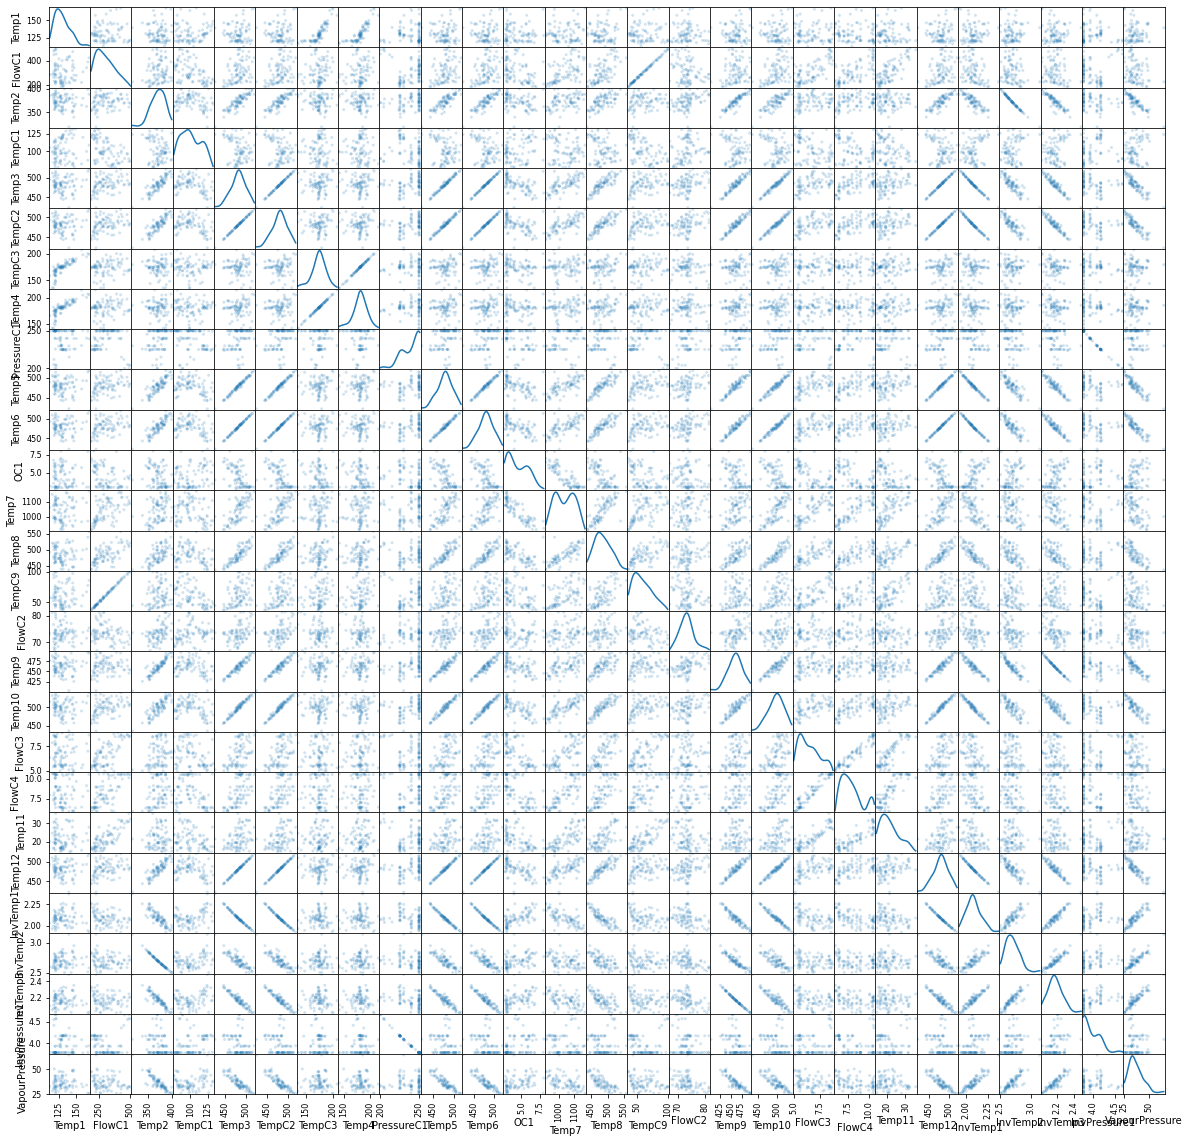

In [173]:
#scatter_matrix(distill.iloc[0::3,:], alpha = 0.2, figsize=(20, 20),  diagonal = "kde");

Which 2 columns are the most correlated with the outcome variable called "VapourPressure"?

```python
distill.corr()
distill.corr().iloc[...] # <-- fill in some code to show only the last row of the correlation matrix
```

Temp9            -0.917730
Temp5            -0.909300
Temp12           -0.904225
Temp6            -0.901668
Temp3            -0.900017
TempC2           -0.899899
Temp2            -0.886628
Temp10           -0.861789
Temp8            -0.756223
Temp7            -0.453747
FlowC4           -0.366443
FlowC3           -0.355872
FlowC2           -0.353991
TempC9           -0.195908
FlowC1           -0.193701
Temp11           -0.102214
Temp1            -0.039136
Temp4            -0.020000
TempC3           -0.017537
InvPressure1     -0.014673
PressureC1        0.005279
TempC1            0.233138
OC1               0.329478
InvTemp2          0.891112
InvTemp1          0.911963
InvTemp3          0.926652
VapourPressure    1.000000
Name: VapourPressure, dtype: float64

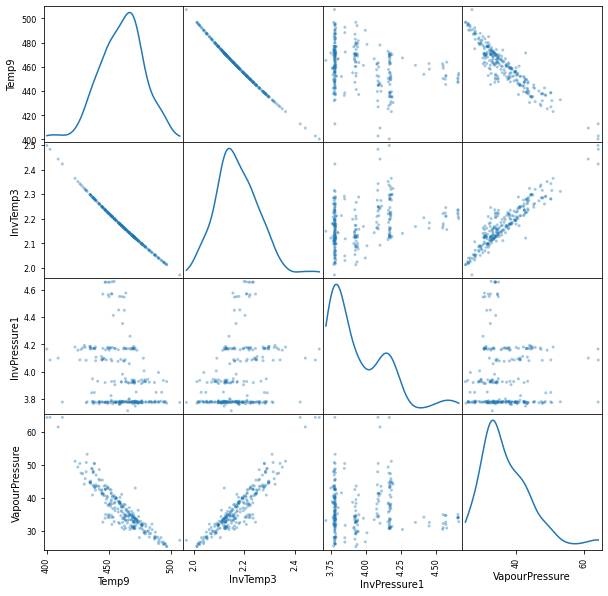

In [191]:
temp = distill.corr().iloc[-1]
display(temp.sort_values())
scatter_matrix(distill.loc[:, ["Temp9", "InvTemp3", "InvPressure1", "VapourPressure"]], alpha = 0.4, figsize=(10, 10),  diagonal = "kde");


Let us build a regression model using that measurement of "H2S", the concentration of hydrogen sulfide in the cheese, to predict its `Taste`.

There are 30 measurements (rows) in the dataset. For this demonstration we will use the 15 measurements (0, 2, 4, ... 28) to build the model, and then the other 15 measurements (1, 3, 5, ... 29) to test how well we can predict taste.

To select every second row in an alternating way:
```python
build = cheese.iloc[0:30:2]
display(build)
test = cheese.iloc[1:30:2]
display(test)
```

Try it below, and use the `.shape` command to verify the `build`ing and `test`ing data have the correct shape.

First, we set up an `instance` of the linear regression model:
```python
mymodel = LinearRegression()
type(mymodel)
```

The `mymodel` is an object. It is an object of a linear regression model, but it is empty at the moment. We will provide it some training data, to build the model, in this way:

```python
mymodel = LinearRegression()
mymodel.fit(X, y)
```

but we have to tell it what is `X` and what is `y`. So we have a small detour...

We need numeric values for `X` and `y`. We can get those as follows.

```python
print(build["H2S"])  # A Pandas Series (single column from the matrix of Cheese data)
print(build["H2S"].values)  # NumPy vector of values, 
print(build["H2S"].values.shape)  # Notice the vector is just a 1-D array of 30 values
print(build["H2S"].values.reshape(-1, 1)) # Force them into a single column
print(build["H2S"].values.reshape(-1, 1).shape)  # Now we have the right shape for scikit-learn
```

Scikit-learn requires the `X` data (the values used to predict `y`) to be a column vector or a matrix. Notice that a column vector is just a matrix with 1 column. This is because, you will see later, you can have 1 or more columns used to predict `y`. Therefore every input used to predict `y` must be in a column. Each row in the input matrix is one observation.

There is a shortcut to force the column to be extracted as a column:

```python
build[["H2S"]].values
build[["H2S"]].values.shape  # check what the shape is
```

So this will work to build your regression model:

```python

# A single column in matrix X (capital X indicates one or more input columns)
X = build[["H2S"]].values
y = build["Taste"].values
mymodel = LinearRegression()
mymodel.fit(X, y)
```

If you run this code and see no error messages, the model has been built. But it is not that exciting. 

So what can you do with this model? Use 
```python
dir(mymodel)
```
to ask Python what can be done. Note that the ``dir(...)`` function works on any object and is something that you will use regularly.

There are several interesting *methods* that you see there which we will get to use.

* `coef_`
* `intercept_`
* `predict`
* `rank_`
* `score`

The first two, are as you might guess, the intercept of the model and the coefficient (slope).

```python
print(f"The intercept is {mymodel.intercept_} and the slope is = {mymodel.coef_}")
```

Now it is not so handy having all those decimal places. Python allows you to truncate them to the desired number:

```python
print(f"The intercept is {mymodel.intercept_:.5g} and the slope is = {mymodel.coef_}")
```

We have to be a bit more careful with the slope. It is an array (see the square brackets?): so we need to extract the first entry from that vector before displaying it:
```python
print(f"The intercept is {mymodel.intercept_:.5g} and the slope is = {mymodel.coef_[0]:.5g}")
```

Try this as well:
```python
print(f"The intercept is {mymodel.intercept_:.5f} and the slope is = {mymodel.coef_[0]:.5f}")
```
There is a subtle difference between the `f` and the `g` format specifiers.

In [150]:
build = cheese.iloc[0:200]
X_build = build[["InvTemp3"]].values
y_build = build["VapourPressure"].values
mymodel = LinearRegression()
mymodel.fit(X=X_build, y=y_build)
print(f"The intercept is {mymodel.intercept_:.4g} and the slope is = {mymodel.coef_[0]:.4g}")

The intercept is -128.5 and the slope is = 76.13


<AxesSubplot:xlabel='InvTemp3', ylabel='VapourPressure'>

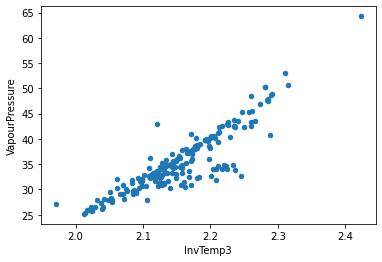

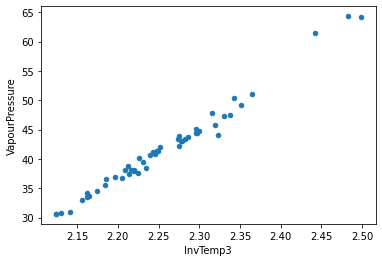

TODO: Visualize this with Seaborn

Next, we would like to extract some idea of how the model performs. For that we have to take a look at the predictions of the `build`ing data, and then of the `test`ing data.

For the model building data:
```python
predict_build = mymodel.predict(X_build)
errors_build = y_build - predict_build
avg_absolute_error = np.nanmean(np.abs(errors_build))
```

In [151]:
predict_build = mymodel.predict(X_build)
errors_build = y_build - predict_build
avg_absolute_error = pd.Series(errors_build).abs().mean()
avg_absolute_error 


1.8751450770825844

In [153]:
test = cheese.iloc[200:]
X_test = test[["InvTemp3"]].values
y_test = test["VapourPressure"].values

predict_test = mymodel.predict(X_test)
errors_test = y_test - predict_test
avg_absolute_error = pd.Series(errors_test).abs().mean()
avg_absolute_error 

1.9788871919692939

In [161]:
predictors = ["InvTemp3", "InvPressure1" ]
X_build_MLR = build[predictors].values
y_build = build["VapourPressure"].values
full_model = LinearRegression()
full_model.fit(X=X_build_MLR, y=y_build)
print(f"The intercept is {full_model.intercept_:.5f} and the slope is = {full_model.coef_}")
predict_MLR_build = full_model.predict(X_build_MLR)
errors_MLR_build = y_build - predict_MLR_build
avg_absolute_error_MLR_build = pd.Series(errors_MLR_build).abs().mean()
avg_absolute_error_MLR_build



The intercept is -101.91491 and the slope is = [81.1501202  -9.56356174]


0.9069484718453001

In [162]:
test = cheese.iloc[200:]
X_test_MLR = test[predictors].values
y_test = test["VapourPressure"].values
predict_MLR_test = full_model.predict(X_test_MLR)
errors_MLR_test = y_test - predict_MLR_test
avg_absolute_error_MLR_test = pd.Series(errors_MLR_test).abs().mean()
avg_absolute_error_MLR_test 




0.6056633330452365

In [ ]:
# IGNORE this. Execute this cell to load the notebook's style sheet.
from IPython.core.display import HTML
css_file = './images/style.css'
HTML(open(css_file, "r").read())